In [10]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

importamos las funciones para los pokemons

In [11]:
pokeballs = ['pokeball','ultraball','fastball','heavyball']
with open('pokemon_clean.json') as f:
    pokes = json.load(f)
factory = PokemonFactory('pokemon_clean.json')

In [12]:
aux = []
for pok, detail in pokes.items():
    print(pok)

jolteon
snorlax
onix
charizard
bulbasaur
squirtle
gyarados
machamp
alakazam
lapras
arcanine
dragonite


In [13]:
aux = []
for pok, detail in pokes.items():
    beast = factory.create(pok,100,StatusEffect.NONE,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok, 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
df = pd.DataFrame(aux)
df


,pokemon,pokeball,success,noise,weight,speed,catch_rate
0,jolteon,pokeball,False,0.05,54.0,130,0.059298
1,jolteon,pokeball,False,0.05,54.0,130,0.060546
2,jolteon,pokeball,False,0.05,54.0,130,0.062410
3,jolteon,pokeball,False,0.05,54.0,130,0.054720
4,jolteon,pokeball,False,0.05,54.0,130,0.057185
...,...,...,...,...,...,...,...
47995,dragonite,heavyball,False,0.05,210.0,80,0.033550
47996,dragonite,heavyball,False,0.05,210.0,80,0.032693
47997,dragonite,heavyball,False,0.05,210.0,80,0.032139
47998,dragonite,heavyball,False,0.05,210.0,80,0.031389


In [14]:
probabilidades = df.groupby(['pokemon', 'pokeball'])['success'].mean()
probabilidades

pokemon    pokeball 
alakazam   fastball     0.245
           heavyball    0.029
           pokeball     0.060
           ultraball    0.130
arcanine   fastball     0.095
           heavyball    0.068
           pokeball     0.109
           ultraball    0.210
bulbasaur  fastball     0.052
           heavyball    0.028
           pokeball     0.062
           ultraball    0.107
charizard  fastball     0.237
           heavyball    0.038
           pokeball     0.069
           ultraball    0.129
dragonite  fastball     0.060
           heavyball    0.032
           pokeball     0.061
           ultraball    0.110
gyarados   fastball     0.066
           heavyball    0.030
           pokeball     0.058
           ultraball    0.126
jolteon    fastball     0.242
           heavyball    0.028
           pokeball     0.053
           ultraball    0.130
lapras     fastball     0.055
           heavyball    0.031
           pokeball     0.042
           ultraball    0.109
machamp    fastball

 ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intr´ınsecas de cada Pokemon? Justificar.
Sugerencia: Comparar efectividad (success/total attemps) como proporci´on de la
efectividad de la Pokebola b´asica para cada Pokemon

Queremos ver el efecto de las stats de un pokemon en el catch rate para una pokebola dada.

In [15]:
probs_w = df.groupby(['pokeball','weight',]).mean()

C:\Users\juana\AppData\Local\Temp\ipykernel_20656\2942025326.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probs_w = df.groupby(['pokeball','weight',]).mean()


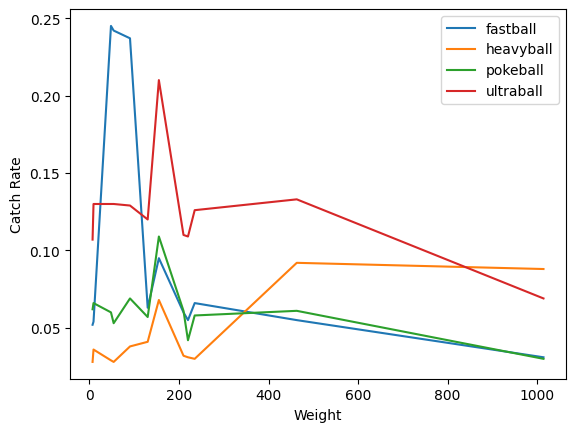

In [16]:

df_reset = probs_w.reset_index()
pokeballs = df_reset['pokeball'].unique()

for pokeball in pokeballs:
    subset = df_reset[df_reset['pokeball'] == pokeball]
    plt.plot(subset['weight'], subset['success'], label=pokeball)

plt.xlabel('Weight')
plt.ylabel('Catch Rate')
plt.legend()
plt.show()

In [17]:
probs_s = df.groupby(['pokeball','speed',]).mean()
probs_s

C:\Users\juana\AppData\Local\Temp\ipykernel_20656\526806195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probs_s = df.groupby(['pokeball','speed',]).mean()


success  weight  catch_rate
pokeball  speed                             
fastball  30       0.031  1014.1    0.032530
          43       0.054     9.0    0.058595
          45       0.052     6.9    0.058690
          55       0.063   130.0    0.058414
          60       0.055   220.0    0.058536
          70       0.055   463.0    0.058629
          80       0.060   210.0    0.058656
          81       0.066   235.0    0.058560
          95       0.095   155.0    0.097792
          100      0.237    90.5    0.234534
          120      0.245    48.0    0.261007
          130      0.242    54.0    0.234882
heavyball 30       0.088  1014.1    0.084715
          43       0.036     9.0    0.032483
          45       0.028     6.9    0.032652
          55       0.041   130.0    0.032571
          60       0.031   220.0    0.032666
          70       0.092   463.0    0.084573
          80       0.032   210.0    0.032602
          81       0.030   235.0    0.032562
          95       0.068   155.0    0.071497
          100      0.038    90.5    0.032572
          120      0.029    48.0    0.038921
          130      0.028    54.0    0.032575
pokeball  30       0.030  1014.1    0.032650
          43       0.066     9.0    0.058574
          45       0.062     6.9    0.058719
          55       0.057   130.0    0.058550
          60       0.042   220.0    0.058741
          70       0.061   463.0    0.058622
          80       0.061   210.0    0.058541
          81       0.058   235.0    0.058687
          95       0.109   155.0    0.097905
          100      0.069    90.5    0.058547
          120      0.060    48.0    0.065158
          130      0.053    54.0    0.058701
ultraball 30       0.069  1014.1    0.065133
          43       0.130     9.0    0.116845
          45       0.107     6.9    0.117305
          55       0.120   130.0    0.117487
          60       0.109   220.0    0.117257
          70       0.133   463.0    0.116907
          80       0.110   210.0    0.117400
          81       0.126   235.0    0.117173
          95       0.210   155.0    0.195310
          100      0.129    90.5    0.116936
          120      0.130    48.0    0.130009
          130      0.130    54.0    0.117347

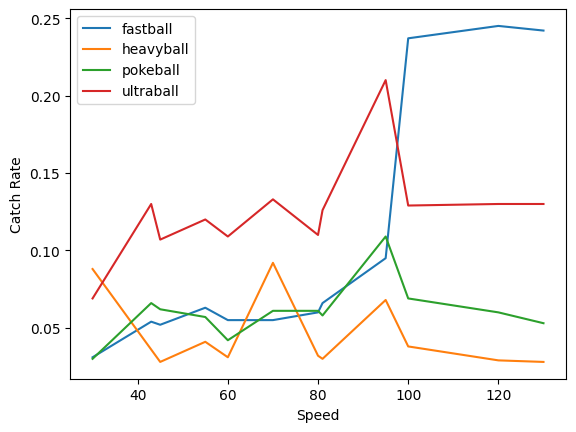

In [18]:

df_reset = probs_s.reset_index()
pokeballs = df_reset['pokeball'].unique()

for pokeball in pokeballs:
    subset = df_reset[df_reset['pokeball'] == pokeball]
    plt.plot(subset['speed'], subset['success'], label=pokeball)

plt.xlabel('Speed')
plt.ylabel('Catch Rate')
plt.legend()
plt.show()
